In [1]:
pip install utils

Note: you may need to restart the kernel to use updated packages.


In [18]:
from fastai.vision.all import *
from utils import *
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rc('image', cmap='Greys')

In [19]:
wild = r'wild animal images'

In [20]:
animal = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [21]:
dls = animal.dataloaders(wild)

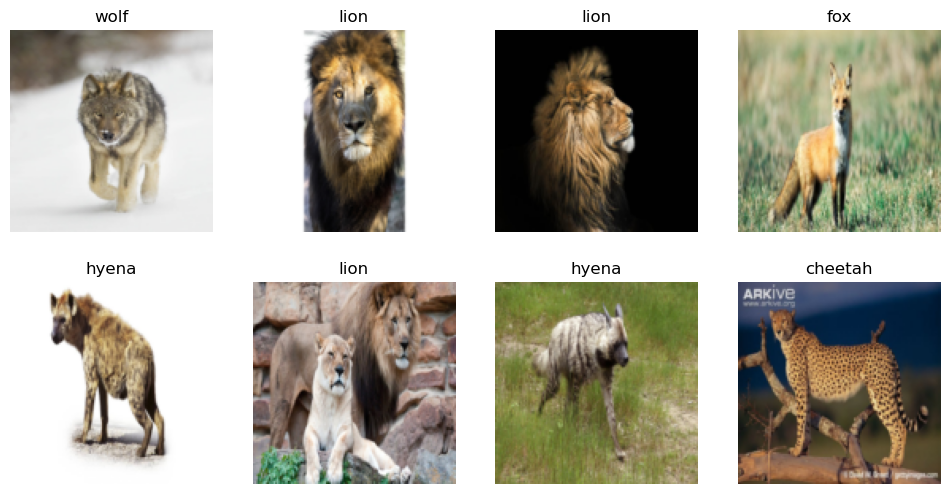

In [22]:
dls.valid.show_batch(max_n=8, nrows=2)

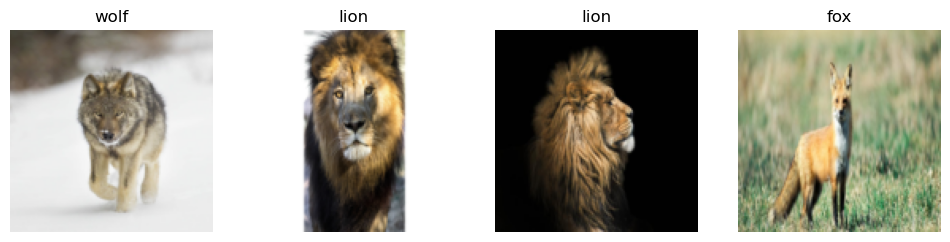

In [23]:
animal = animal.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animal.dataloaders(wild)
dls.valid.show_batch(max_n=4, nrows=1)

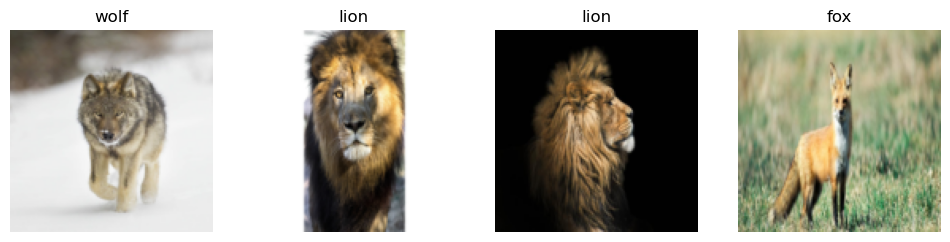

In [24]:
animal = animal.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = animal.dataloaders(wild)
dls.valid.show_batch(max_n=4, nrows=1)

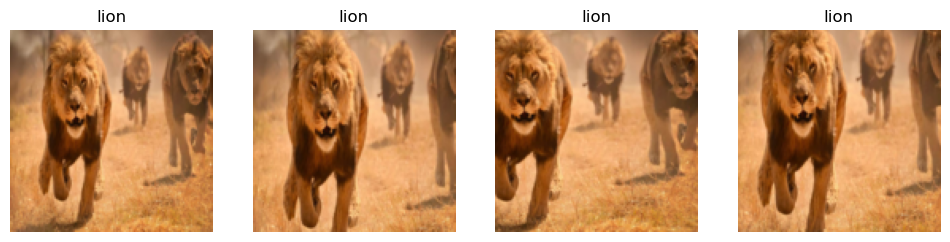

In [25]:
animal = animal.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = animal.dataloaders(wild)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [26]:
animal = animal.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal.dataloaders(wild)

In [27]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.171584,0.098707,0.017442,02:52


C:\Users\tehze\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.125936,0.088164,0.020349,04:21
1,0.101873,0.099394,0.023256,04:54
2,0.078645,0.076642,0.029070,04:38
3,0.062388,0.076179,0.029070,04:50


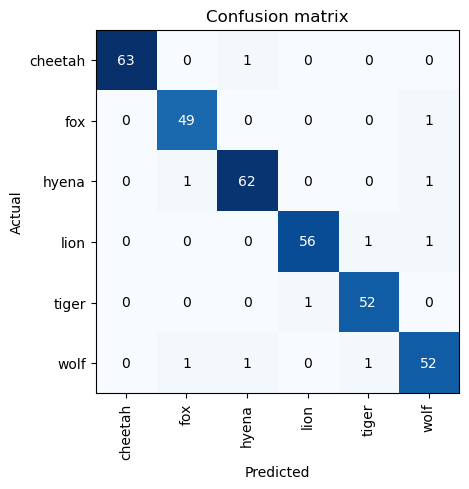

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

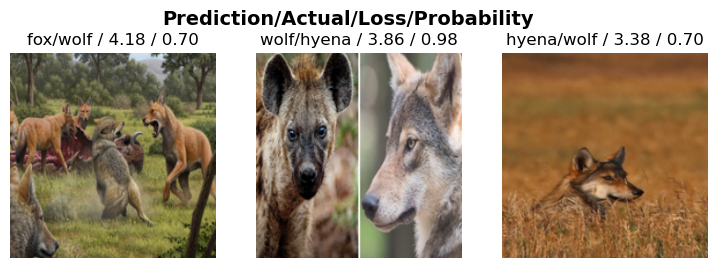

In [32]:
interp.plot_top_losses(3, nrows=1)

In [33]:
learn.export()

In [35]:
wild = Path()
wild.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [36]:
learn_inf = load_learner(wild/'export.pkl')

In [37]:
learn_inf.predict('wild animal images/wolf/00000509_224resized.png')

('wolf',
 tensor(5),
 tensor([1.3587e-08, 4.6734e-05, 9.7615e-06, 3.7239e-06, 6.1606e-09, 9.9994e-01]))

In [53]:
learn_inf.dls.vocab

['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']

In [74]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [76]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [77]:
btn_upload = SimpleNamespace(data = ['wild animal images/wolf/00000509_224resized.png'])

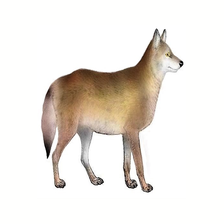

In [78]:
img = PILImage.create(btn_upload.data[0])
img

In [79]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [80]:
pred,pred_idx,probs = learn_inf.predict(img)

In [81]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: wolf; Probability: 0.9999')

In [82]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [97]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [98]:
btn_upload = widgets.FileUpload()

In [99]:
VBox([widgets.Label('Select your animal!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

TypeError: 'list' object is not callable

In [100]:
VBox

[Label(value='Select your animal!'),
 FileUpload(value={}, description='Upload'),
 Button(description='Classify', style=ButtonStyle()),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<PIL.Image.Image image mode=RGB size=128x128>', 'image/png': 'iVBORw0KGgoAAAANSUhEUgAAAIAAAACACAIAAABMXPacAAApoklEQVR4Ae2deZBdd3Xn7768+9Z+vau1L7Zky7JlMLbMYjBDhUAyGTLFMDV/zBSpmqWoSdUkqZqpSjFkqGQmTIVJpqhKJRDATIFxsKnCGIgBA8YstoyxLNuydsnd6lZLvbx++7v7nc/vPVm2JbfU6n6tB7ivVe3X9937u/eec37nfM/3nN9tOUliaW3rnQSU3l167cpCAmsK6LEdrClgTQE9lkCPL782A9YU0GMJ9PjyazNgTQE9lkCPL782A9YU0GMJ9PjyazNgTQE9lkCPL782A3qsAG3F15dXPMKv7ACJJF316ThmRdvaDLiC+K4q/Sucu9Sv1hRwQVLlcvnzn/88P5NEGPXs7OwLL7ywVCmu4Lg1BVwQ3g9/+MOHHnroySeflGVh+Pfd98WvPnB/FEUrkO2STl1TgBCT67o/fvxHfX2Fc+fOBUHYaNTOT5/ZuGF9rVZbkhRXcNDKg/AKLv4rc+rLJ080q+Wt2zYvLJROnTo5NXFs3ejALbv3KMqqG+iaAoQVvHjwQNYxt2/fkknnjx567tihZzbt2KVoRhAEq20kq67h1X6Arow/feblocFiPufs2rnj7NkJTYrHhoY1VVZVtSvjX2GQNQVILzz79OTLp/r6+2zbzOZSYRjGsTyQzxtK4jjOFWTXla/e7AoozZ//7N/8uZK0MplMM

In [101]:
pip install voila

  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-1.13-py3-none-any.whl.metadata (2.6 kB)
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB 640.0 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/3.9 MB 2.9 MB/s eta 0:00:02
   ----- ---------------------------------- 0.5/3.9 MB 4.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.9 MB 4.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.9 MB 4.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.9 MB 4.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.9 MB 4.7 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.9 MB 4.7 MB/s eta 0:00:01
   ---------- ----------------------------- 1.1/3.9 MB 2